# Task Details

The attached data-set shows the happiest countries on earth. You may join any data you want to explain why countries are ranked as they are here.

The goal of this task is to find out what factors contribute to happiness. You can join any other data and use any insights you might have that show a strong correlation between the factors you come up with.  

Expected Submission We want the final code to be submitted on Github and a demo of it in the final interview.  

Please use comments to explicit the code.  The solution should contain the correlation between the factors discovered and the happiness score of the data-set (the actual number).  Any charts explaining this correlation will also help.  Evaluation The best solutions will both have a good correlation score, but are also creative and explain the work well.


In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


%matplotlib inline

## Load a sample dataset

In [3]:
partial_dataset = pd.read_csv('./data/2015.csv')

In [4]:
# view dataset columns
partial_dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### Trying to understand the format of the data:


* Country - The name of the country that is studied
* Region - Location
* Happiness Rank - How high is this country ranked?
* Happiness Score - I'll take this as an axiomatic measurement of happiness
* Standard Error - Measure of the width of the sampling distribution (will assume that it's for the happiness score)
* Economy (GDP per capita) - how much each citizen contributes to the economy on average
* Health (Life Expectancy)
* Freedom - this raises some red flags as it would seem hard to measure
* Trust - government corruption. Same as freedom, but I can see it being easier to quantify
* Generosity - same issue as the two above, but of all of them this can easiliy be quantified economically.
* Dystopia residual: I found the explanation below in the official world happiness report

### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive (or zero, in six instances) width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2017-2019 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.1 shows the average residual for each country if the equation in Table 2.1 is applied to average 2017- 2019 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.1, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.97 on the 0 to 10 scale. Table 7 of the online Statistical Appendix 1 for Chapter 2 puts the Dystopia plus residual block at the left side, and also draws the Dystopia line, making it easy to compare the signs and sizes of the residuals in different countries.




# Load the entire dataset

In [5]:
path = './data'
all_files = glob.glob(path + '/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

### Create a Sample Correlation Matrix

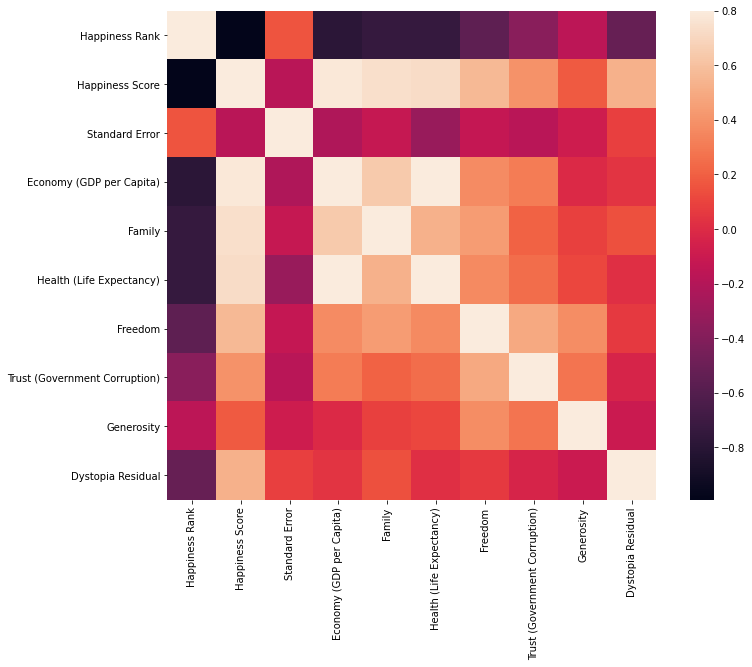

In [7]:
correlation_matrix = partial_dataset.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(correlation_matrix, vmax=.8, square = True);

### Create scatterplots

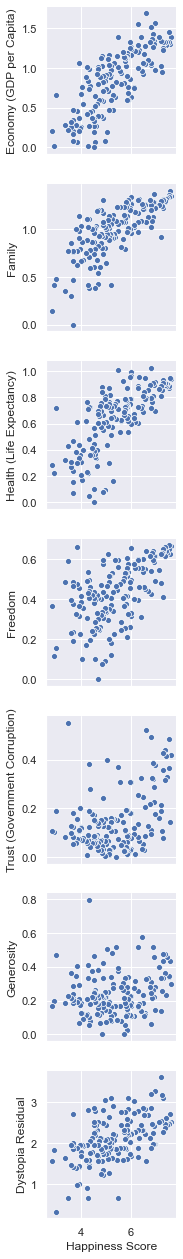

In [14]:
sns.set()
cols = ['Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
sns.pairplot(partial_dataset[cols], x_vars=['Happiness Score'], y_vars = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'])
plt.show()

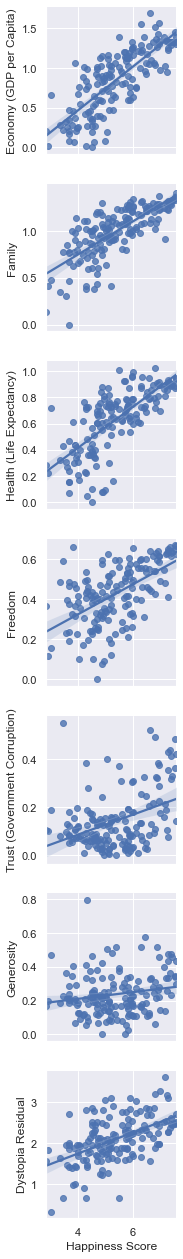

In [15]:
regression_plots = sns.pairplot(partial_dataset[cols], x_vars=['Happiness Score'], y_vars = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'], kind="reg")